# Import
Import **numpy**, **pandas**, **matplotlib**, and **scipy**.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import chi2_contingency

# The Dataset

The CBMS - Community Based Monitory System is used to ...

The dataset was initially provided by Ms. Ethel Ong for our Advanced Database (ADVANDB) class.

Both of the Marinduque and Palawan dataset was collected during 2014-2015 census year through a mobile application, where the head of a household would fill-up a form in an app. However, other parts of Palawan used a physical form (DILG-CBMS, 2016). Those who used a physical form in Palawan are not included in the dataset.

There are about **83** variables in the dataset, but we are only going to use only **5** variables in this study. The following are the descriptions of the variables that we are going to use:

- **`sex`**: Sex/Gender. <br>
&emsp; 1 - Male <br>
&emsp; 2 - Female <br>
- **`age_yr`**: Age.
- **`ynotsch`**: Reason not in school. <br>
&emsp; 1 - Schools are very far <br>
&emsp; 2 - No school within the barangay <br>
&emsp; 3 - No regular transportation <br>
&emsp; 4 - High cost of education <br>
&emsp; 5 - Illness/Disability <br>
&emsp; 6 - Housekeeping/taking care of siblings <br>
&emsp; 7 - Marriage <br>
&emsp; 8 - Employment/looking for work <br>
&emsp; 9 - Lack of personal interest <br>
&emsp; 10 - Cannot cope with school work <br>
&emsp; 11 - Finished schooling <br>
&emsp; 12 - Problem with school record <br>
&emsp; 13 - Problem with birth certificate <br>
&emsp; 14 - Too young to go to school <br>
&emsp; 15 - Others
- **`educal`**: Educational Attainment. <br>
&emsp; 0 - No Grade <br>
&emsp; 1 - Day Care <br>
&emsp; 2 - Nurser/Kindergarten/Preparatory <br>
&emsp; 11 - Grade 1 <br>
&emsp; 12 - Grade 2 <br>
&emsp; 13 - Grade 3 <br>
&emsp; 14 - Grade 4 <br>
&emsp; 15 - Grade 5 <br>
&emsp; 16 - Grade 6 <br>
&emsp; 17 - Grade 7 <br>
&emsp; 18 - Grade 8 <br>
&emsp; 19 - Grade 9/3rd Year HS <br>
&emsp; 20 - Grade 10/4th Year HS <br>
&emsp; 21 - Grade 11 <br>
&emsp; 22 - Grade 12 <br>
&emsp; 23 - 1st year PS PS/N-T/TV <br>
&emsp; 24 - 2nd year PS PS/N-T/TV <br>
&emsp; 25 - 3rd year PS PS/N-T/TV <br>
&emsp; 31 - 1st year College <br>
&emsp; 32 - 2nd year College <br>
&emsp; 33 - 3rd year College <br>
&emsp; 34 - 4th year College or higher <br>
&emsp; 41 - Post grad with units <br>
&emsp; 51 - ALS Elementary <br>
&emsp; 52 - ALS Secondary <br>
&emsp; 53 - SPED Elementary <br>
&emsp; 54 - SPED Secondary <br>
&emsp; 100 - Grade school graduate <br>
&emsp; 200 - High school graduate <br>
&emsp; 210 - Post secondary graduate <br>
&emsp; 300 - College graduate <br>
&emsp; 400 - Master's/PhD graduate <br>
- **`pwd_type`**: Disability type. <br>
&emsp; 1 - Total blindness <br>
&emsp; 2 - Partial blindness <br>
&emsp; 3 - Low vision <br>
&emsp; 4 - Totally deaf <br>
&emsp; 5 - Partially deaf <br>
&emsp; 6 - Oral defect <br>
&emsp; 7 - One hand <br>
&emsp; 8 - No hands <br>
&emsp; 9 - One leg <br>
&emsp; 10 - No legs <br>
&emsp; 11 - Mild Cerebral palsy <br>
&emsp; 12 - Severe Cerebral palsy <br>
&emsp; 13 - Retarded <br>
&emsp; 14 - Mentally ill <br>
&emsp; 15 - Mentally retardation <br>
&emsp; 16 - Multiple impairment <br>
&emsp; 17 - Others <br>
- **`voted_last_election`**: Voted last election. <br>
&emsp; 1 - Yes <br>
&emsp; 2 - No <br>
&emsp; 3 - Don't know<br>

## **Other Variables**

Other variables and its description can be access through this PDF/link **https://tinyurl.com/cbms-data-dictionary** pp. 27-35.

# Reading the Dataset

## Reading the `Marinduque` dataset.

In [2]:
marinduque_mem_df = pd.read_csv("hpq_mem_marinduque.csv", dtype='unicode')

In [3]:
marinduque_df = marinduque_mem_df[["sex", "age_yr", "ynotsch", "educal", "pwd_type", "voted_last_election"]].copy()

Create a new column called **province** and set it as **Marinduque**. We added this column to distinguish the dataset between the two provinces.

In [4]:
marinduque_df["province"] = "Marinduque"
marinduque_df

,sex,age_yr,ynotsch,educal,pwd_type,voted_last_election,province
0,1,53,NaN,16,NaN,1,Marinduque
1,2,52,NaN,16,NaN,1,Marinduque
2,2,23,11,32,NaN,2,Marinduque
3,1,14,NaN,17,NaN,NaN,Marinduque
4,1,12,NaN,15,NaN,NaN,Marinduque
...,...,...,...,...,...,...,...
204776,1,20,NaN,32,NaN,NaN,Marinduque
204777,1,18,NaN,20,NaN,NaN,Marinduque
204778,1,15,NaN,19,NaN,NaN,Marinduque
204779,1,13,NaN,17,NaN,NaN,Marinduque


There are **204,781** observations in the **Marinduque** member record dataset.

## Reading the `Palawan` dataset

In [5]:
palawan_mem_df = pd.read_csv("hpq_mem_palawan.csv", dtype='unicode')

In [6]:
palawan_df = palawan_mem_df[["sex", "age_yr", "ynotsch", "educal", "pwd_type", "voted_last_election"]].copy()

Again, create a new column called **province** and set it as **Palawan**.

In [7]:
palawan_df["province"] = "Palawan"
palawan_df

,sex,age_yr,ynotsch,educal,pwd_type,voted_last_election,province
0,1,57,15,14,NaN,1,Palawan
1,2,46,15,16,NaN,1,Palawan
2,2,21,NaN,19,NaN,1,Palawan
3,1,16,1,16,NaN,2,Palawan
4,1,11,NaN,15,NaN,NaN,Palawan
...,...,...,...,...,...,...,...
459097,1,29,8,200,NaN,1,Palawan
459098,2,26,4,200,NaN,2,Palawan
459099,2,17,NaN,19,NaN,1,Palawan
459100,2,21,6,210,NaN,1,Palawan


There are **459,102** observations in the **Palawan** member record dataset.

## Merging the Two Dataset

In [8]:
all_df = palawan_df.append(marinduque_df, ignore_index=True)
all_df

,sex,age_yr,ynotsch,educal,pwd_type,voted_last_election,province
0,1,57,15,14,NaN,1,Palawan
1,2,46,15,16,NaN,1,Palawan
2,2,21,NaN,19,NaN,1,Palawan
3,1,16,1,16,NaN,2,Palawan
4,1,11,NaN,15,NaN,NaN,Palawan
...,...,...,...,...,...,...,...
663878,1,20,NaN,32,NaN,NaN,Marinduque
663879,1,18,NaN,20,NaN,NaN,Marinduque
663880,1,15,NaN,19,NaN,NaN,Marinduque
663881,1,13,NaN,17,NaN,NaN,Marinduque


Merging the 2 dataset gives us **663,883** observations.

# Cleaning the Dataset

## `sex` variable - Sex/Gender

We check if the values for the variable **sex** is either **1** or **2**.

In [9]:
all_df["sex"].unique()

array(['1', '2', '7/23/2003'], dtype=object)

We now map **1** to **Male** and **2** to **Female**.

In [10]:
all_df['sex'] = all_df['sex'].map({'1': 'Male', '2': 'Female'})

We check again if the mapping was executed successfully.

In [11]:
all_df["sex"].unique()

array(['Male', 'Female', nan], dtype=object)

We now drop the observations with **null** values in the **sex** variable.

In [12]:
all_df = all_df.dropna(subset=['sex'])

We check if null values were successfully dropped.

In [13]:
all_df["sex"].unique()

array(['Male', 'Female'], dtype=object)

## `age_yr` variable - Age

We check if there are any **null** values in the variable **age**.

In [14]:
all_df["age_yr"].isnull().any()

False

There are'nt any null values in the variable **age**. Now, we check what is/are data type/s of the variable **age**.

In [15]:
all_df['age_yr'].apply(type).value_counts()

<class 'str'>    663882
Name: age_yr, dtype: int64

Based on the result, the variable **age** is in **string** format. We now change the data type of variable **age** from **string** to **integer**.

In [16]:
all_df['age_yr'] = all_df['age_yr'].astype(int)

<ipython-input-16-7bb2fee67357>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_df['age_yr'] = all_df['age_yr'].astype(int)


We will now use **box plot** to see if there are any **outliers** in the variable **age**.

Text(0.5, 1.0, 'Age boxplot')

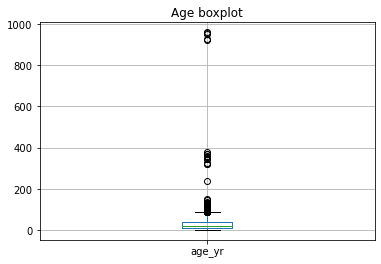

In [17]:
all_df.boxplot(column="age_yr")
plt.title("Age boxplot")

We can see in the box plot that there are several **outliers** in the variable **age**. We will now see what are these values.

In [18]:
all_df.sort_values('age_yr')['age_yr'].tail(25)

379071    125
330357    126
350052    129
243909    130
190761    136
511586    146
388241    148
378995    238
322254    319
117623    321
383780    325
361957    346
233445    346
466060    354
380757    355
382341    355
182077    361
469267    369
416659    369
226332    381
172461    925
414833    927
377107    953
256153    957
479404    961
Name: age_yr, dtype: int32

We now **drop** these observations whose **age** are **greater than 120**.

In [19]:
all_df = all_df.drop(all_df[all_df['age_yr'] > 120].index)

Let us see now what is the **max** value of **age** in the dataset.

In [20]:
all_df['age_yr'].max()

119

**119** is now the max age in our dataset. We now run the **box plot** again.

Text(0.5, 1.0, 'Age boxplot')

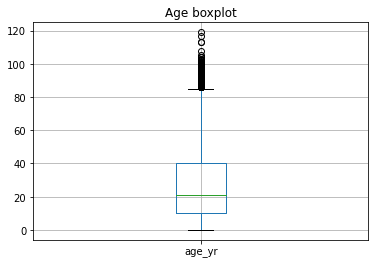

In [21]:
all_df.boxplot(column="age_yr")
plt.title("Age boxplot")

Based on the box plot, we can see that the **extreme outliers** are now **gone**. In the box plot, we can also see that the **median** is around **21** years old.

We now apply binning in the variable **age** and create a column called **age_group**.

In [22]:
bins= [0,7,13,18,25,31,37,43,49,55,61,120]
labels = ['0-6','7-12','13-17','18-24','25-30','31-36','37-42','44-48','49-54','55-60','60+']
#bins= [0,10,20,30,40,50,60,120]
#labels = ['0-9','10-19','20-29','30-39','40-49','50-59','60+']
all_df['age_group'] = pd.cut(all_df['age_yr'], bins=bins, labels=labels, right=False)
all_df

,sex,age_yr,ynotsch,educal,pwd_type,voted_last_election,province,age_group
0,Male,57,15,14,NaN,1,Palawan,55-60
1,Female,46,15,16,NaN,1,Palawan,44-48
2,Female,21,NaN,19,NaN,1,Palawan,18-24
3,Male,16,1,16,NaN,2,Palawan,13-17
4,Male,11,NaN,15,NaN,NaN,Palawan,7-12
...,...,...,...,...,...,...,...,...
663878,Male,20,NaN,32,NaN,NaN,Marinduque,18-24
663879,Male,18,NaN,20,NaN,NaN,Marinduque,18-24
663880,Male,15,NaN,19,NaN,NaN,Marinduque,13-17
663881,Male,13,NaN,17,NaN,NaN,Marinduque,13-17


## `ynotsch` variable - Reason not in school

We check if there are any **null** values in the variable **educal**.

In [23]:
all_df["ynotsch"].isnull().any()

True

We will set the **null** values to **-1**.

In [24]:
all_df.loc[all_df['ynotsch'].isnull(),'ynotsch'] = -1

We will now check what is/are data type/s of the variable **educal**.

In [25]:
all_df["ynotsch"].apply(type).value_counts()

<class 'int'>    369711
<class 'str'>    294145
Name: ynotsch, dtype: int64

Based on the result, the data types for educal are in **string** and **integer** format. We then convert all values to **integer**.

In [26]:
all_df['ynotsch'] = all_df['ynotsch'].astype(int)

We check if all the values are converted to **integer**.

In [27]:
all_df["ynotsch"].apply(type).value_counts()

<class 'int'>    663856
Name: ynotsch, dtype: int64

In [28]:
all_df["ynotsch_full"] = all_df["ynotsch"].map({1: 'Schools are very far',
                                                2: 'No school within the brgy', 
                                                3: 'No regular transportation', 
                                                4: 'High cost of education', 
                                                5: 'Illness/Disability', 
                                                6: 'Housekeeping/taking care of siblings', 
                                                7: 'Marriage', 
                                                8: 'Employment/looking for work', 
                                                9: 'Lack of personal interest', 
                                                10: 'Cannot cope with school work', 
                                                11: 'Finished schooling', 
                                                12: 'Problem with school record', 
                                                13: 'Problem with birth certificate', 
                                                14: 'Too young to go to school', 
                                                15: 'Others'})

## `educal` variable - Educational attainment

We check if there are any **null** values in the variable **educal**.

In [29]:
all_df["educal"].isnull().any()

True

We will set the **null** values to **-1**.

In [30]:
all_df.loc[all_df['educal'].isnull(),'educal'] = -1

We will now check what is/are data type/s of the variable **educal**.

In [31]:
all_df["educal"].apply(type).value_counts()

<class 'str'>    619652
<class 'int'>     44204
Name: educal, dtype: int64

Based on the result, the data types for educal are in **string** and **integer** format. We then convert all values to **integer**.

In [32]:
all_df['educal'] = all_df['educal'].astype(int)

We check if all the values are converted to **integer**.

In [33]:
all_df["educal"].apply(type).value_counts()

<class 'int'>    663856
Name: educal, dtype: int64

We will now check for incorrect inputs.

In [34]:
all_df["educal"].unique()

array([ 14,  16,  19,  15,   2,  13,  33,  20,   0,  32,  11,  18,  -1,
         1,  17,  12, 300,  31,  24, 200,  34,  52, 100,  41, 210,  23,
        51,  25, 400,  53,  21,  22,  54])

We now apply binning/grouping in the variable **educal** or educational attainment and create a column called **educal_range**.

- **`No Grade`**: No Grade.
- **`Day Care`**: Day Care.
- **`Pre-School`**: Pre-School.
- **`Elementary`**: Grade 1 to Grade 6.
- **`Elementary Graduate`**: Elementary Graduate.
- **`High School`**: Grade 7 to Grade 12.
- **`High School Graduate`**: High School Graduate.
- **`Post-Secondary`**: 1st yr to 3rd yr Post-Secondary.
- **`Post-Secondary Graduate`**: Post-Secondary Graduate.
- **`College Undergraduate`**: College 1st yr to 4th yr or higher.
- **`College Graduate`**: College Graduate.
- **`Post-Grad`**: Masters/Doctorate Degree.
- **`SPED`**: Special Education and ALS.

In [35]:
all_df["educal_range"] = all_df["educal"].map({0: 'No Grade', 
                                               1: 'Day Care',
                                               2: 'Pre-School',
                                               11: 'Elementary', 12: 'Elementary', 13: 'Elementary', 14: 'Elementary', 15: 'Elementary', 16: 'Elementary', 100: 'Elementary Graduate',
                                               17: 'High School', 18: 'High School', 19: 'High School', 20: 'High School', 21: 'High School', 22: 'High School', 200: 'High School Graduate',
                                               23: 'Post-Secondary', 24: 'Post-Secondary', 25: 'Post-Secondary', 210: 'Post-Secondary Graduate',
                                               31: 'College Undergraduate', 32: 'College Undergraduate', 33: 'College Undergraduate', 34: 'College Undergraduate',
                                               41: 'Post-Grad', 400: "Post-Grad",
                                               51: 'SPED', 52: 'SPED', 53: 'SPED', 54: 'SPED',
                                               300: 'College Graduate'})

## `pwd_type` variable - Disability type

We check if there are any **null** values in the variable **pwd_type**.

In [36]:
all_df["pwd_type"].isnull().any()

True

Based on the result, there are **null** values present in the **pwd_type** variable. We will set these **null** values to **-1**.

In [37]:
all_df.loc[all_df['pwd_type'].isnull(),'pwd_type'] = -1

We will now check what is/are data type/s of the variable **pwd_type**.

In [38]:
all_df["pwd_type"].apply(type).value_counts()

<class 'int'>    656932
<class 'str'>      6924
Name: pwd_type, dtype: int64

Based on the result, the data types for **pwd_type** are in **integer** and **string** format. We then convert these values to **integer**.

In [39]:
all_df['pwd_type'] = all_df['pwd_type'].astype(int)

We check if all values of **pwd_type** are converted to **integer**.

In [40]:
all_df["pwd_type"].apply(type).value_counts()

<class 'int'>    663856
Name: pwd_type, dtype: int64

Finally, we will now check for incorrect inputs.

In [41]:
all_df["pwd_type"].unique()

array([-1,  4,  7, 14, 17, 16, 15, 13,  2, 12, 11,  9,  1,  5,  6,  3, 10,
        8])

## `voted_last_election` variable - Voted last election

In [43]:
all_df['voted_last_election'].unique()

array(['1', '2', nan, '3'], dtype=object)

In [44]:
all_df.loc[all_df['voted_last_election'].isnull(),'voted_last_election'] = 3

In [45]:
all_df["voted_last_election"].apply(type).value_counts()

<class 'str'>    343414
<class 'int'>    320442
Name: voted_last_election, dtype: int64

In [46]:
all_df['voted_last_election'] = all_df['voted_last_election'].astype(int)

In [47]:
all_df["voted_last_election"].value_counts()

1    325179
3    321908
2     16769
Name: voted_last_election, dtype: int64

# Exploratory Data Analysis

## 1. How many people have achieved a certain level of education?

In [48]:
all_df.groupby(["educal_range", "sex"]).size()

educal_range             sex   
College Graduate         Female     19739
                         Male       13255
College Undergraduate    Female     22352
                         Male       18899
Day Care                 Female      8602
                         Male        8891
Elementary               Female     99224
                         Male      117982
Elementary Graduate      Female     21428
                         Male       23587
High School              Female     53828
                         Male       54786
High School Graduate     Female     35859
                         Male       32465
No Grade                 Female     27927
                         Male       28577
Post-Grad                Female       838
                         Male         998
Post-Secondary           Female      2333
                         Male        3030
Post-Secondary Graduate  Female      2335
                         Male        3078
Pre-School               Female      8931
  

Text(0.5, 1.0, '')

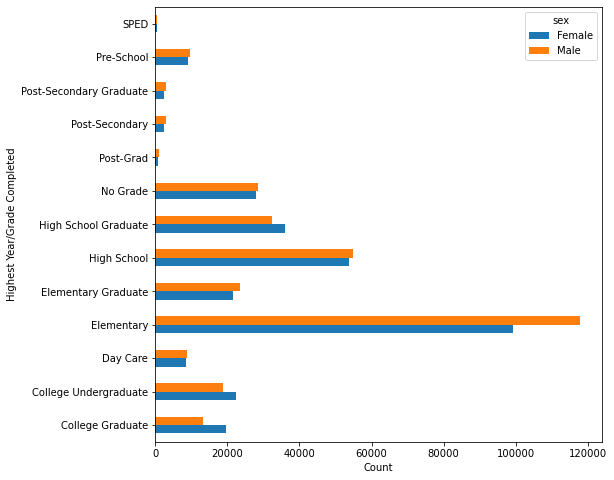

In [49]:
all_df.groupby(["educal_range", "sex"]).size().unstack().plot(kind="barh", figsize=(8, 8))
plt.ylabel('Highest Year/Grade Completed')
plt.xlabel('Count')
plt.title('')

In the provinces of Marinduque and Palawan, more people attended elementary education. On the other hand, we can see that there are more females than males who are college graduates and undergraduates. There are also more females who attended and or completed high school than males.

## 2. Which disability is the most common?

We first apply categoral binning to generalize or group the types of disabilities.

In [50]:
all_df["pwd_type_group"] = all_df["pwd_type"].map({1: 'Blindness', 2: 'Blindness',
                                                  3: 'Low Vision', 4: 'Deaf',
                                                  5: 'Deaf', 6: 'Oral defect',
                                                  7: 'Missing Limb/s', 8: 'Missing Limb/s',
                                                  9: 'Missing Limb/s', 10: 'Missing Limb/s',
                                                  11: 'Mentally Disabled', 12: 'Mentally Disabled',
                                                  13: 'Mentally Disabled', 14: 'Mentally ill',
                                                  15: 'Mentally Disabled', 16: 'Multiple impairment'})

In [51]:
all_df.groupby(["pwd_type_group", "sex"]).size()

pwd_type_group       sex   
Blindness            Female    414
                     Male      444
Deaf                 Female    303
                     Male      327
Low Vision           Female    165
                     Male      180
Mentally Disabled    Female    448
                     Male      588
Mentally ill         Female    300
                     Male      376
Missing Limb/s       Female    118
                     Male      301
Multiple impairment  Female     80
                     Male      119
Oral defect          Female    265
                     Male      277
dtype: int64

Text(0.5, 1.0, '')

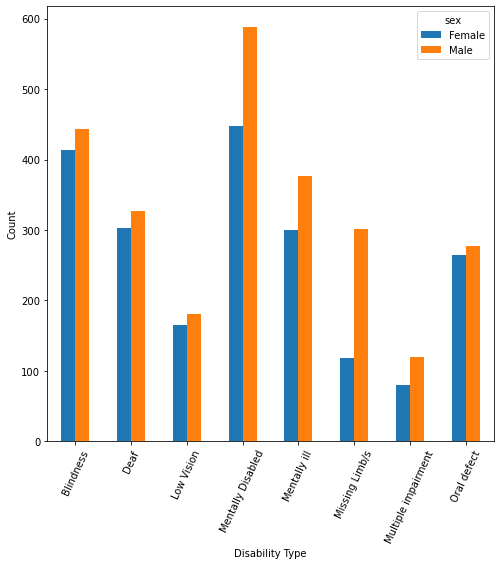

In [52]:
all_df.groupby(["pwd_type_group", "sex"]).size().unstack().plot(kind="bar", figsize=(8, 8))
plt.xlabel('Disability Type')
plt.ylabel('Count')
plt.xticks(rotation=65)
plt.title('')

Base on the graph, we can see that mentally disabled is the most common among other disablities followed by blindness and mental illness. We can also see in the graph that males are more affected with these disabilities than females.

Local Government Unit (LGU) can provide free services like monthly checkups for those who are disabled.

## 3. How many per age group have mental illness?

In the previous question, we discovered that the 3rd most common disablity type is mentall illness.

In [53]:
all_df[all_df["pwd_type_group"] == 'Mentally ill'].groupby(["age_group"]).size()

age_group
0-6       21
7-12      42
13-17     70
18-24    102
25-30     97
31-36     81
37-42     74
44-48     61
49-54     53
55-60     30
60+       45
dtype: int64

<function matplotlib.pyplot.show(*args, **kw)>

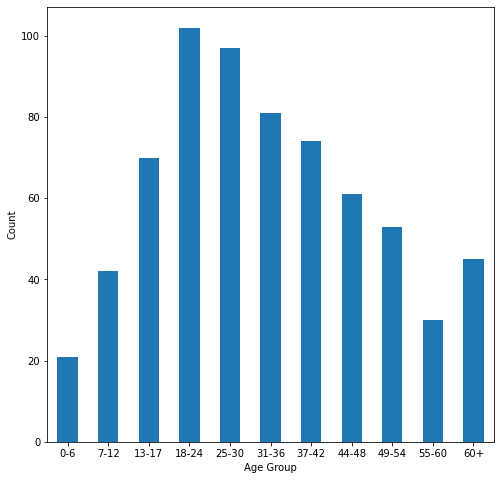

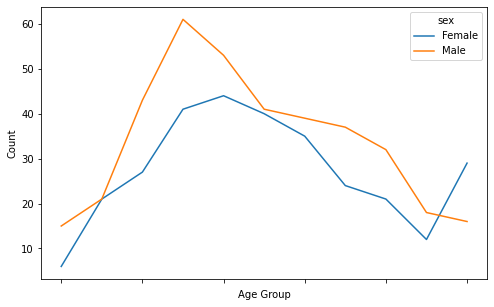

In [54]:
mi_df = all_df[all_df["pwd_type_group"] == 'Mentally ill']
mi_df.groupby(["age_group"]).size().plot(kind="bar", stacked=True, figsize=(8, 8))
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.xticks(rotation=0)
mi_df.groupby(["age_group", "sex"]).size().unstack().plot(figsize=(8, 5))
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.title('')
plt.show

Base on the graphs, age group 18-30 are likely to have mental illness like depression, anxiety, and etc. then followed by the age group 31-42 as these are the peak ages. We can also see that from child to adult there is an increase of having mental illness and getting older from the peak ages has a decrease of having mental illness. On the 2nd graph, we can see that there are more males than females who have mental illness. It is also suprising to see that there is an increase in the age group 60 and above, these maybe due to being alone in the house doing nothing while other member of the family are in school or work.

Local Government Unit (LGU) can provide free early counseling services to certain age groups to prevent them from having mental illness in the future. For older people, LGU can create programs where all old people in a community will gather around and do some activities.

# Research Questions

## 1. Is mental illness dependent to gender and age group?

First, we group the data by sex and age group.

In [55]:
df = all_df[all_df["pwd_type_group"] == "Mentally ill"].groupby("sex")["age_group"].value_counts()
df

sex     age_group
Female  25-30        44
        18-24        41
        31-36        40
        37-42        35
        60+          29
        13-17        27
        44-48        24
        49-54        21
        7-12         21
        55-60        12
        0-6           6
Male    18-24        61
        25-30        53
        13-17        43
        31-36        41
        37-42        39
        44-48        37
        49-54        32
        7-12         21
        55-60        18
        60+          16
        0-6          15
Name: age_group, dtype: int64

We will then convert the data above into table format.

In [56]:
table = pd.DataFrame([df["Male"], df["Female"]], index=["Male", "Female"]).transpose()
table

,Male,Female
18-24,61,41
25-30,53,44
13-17,43,27
31-36,41,40
37-42,39,35
44-48,37,24
49-54,32,21
7-12,21,21
55-60,18,12
60+,16,29


Finally, we will use **chi-squared test** to prove if there is a difference or not.

In [57]:
chi2_contingency(table)

(14.142916307195636,
 0.16657200149052578,
 10,
 array([[56.73372781, 45.26627219],
        [53.95266272, 43.04733728],
        [38.93491124, 31.06508876],
        [45.05325444, 35.94674556],
        [41.15976331, 32.84023669],
        [33.92899408, 27.07100592],
        [29.47928994, 23.52071006],
        [23.36094675, 18.63905325],
        [16.68639053, 13.31360947],
        [25.0295858 , 19.9704142 ],
        [11.68047337,  9.31952663]]))

The $p$-value from the chi-squared test is **0.166572** which is greater than 0.05 confidence level. Since the $p$-value is greater than 0.05 confidence level, it means that we should **not reject** the **null hypothesis** or on the other words there is **no difference** between males and females across age groups having mental illness. 

We saw that there is a difference between gender and age groups on EDA #3. However, chi-squared test proved that mental illness is not dependent to gender and age. Hence, LGU can create a program to address mental illness and provide counseling services to all gender across all age groups.

## 2. Which age group is likely to vote?

In [58]:
all_df[(all_df["voted_last_election"] == 1) & (all_df["age_yr"] >= 18)]["age_group"].value_counts()

18-24    48435
25-30    47756
31-36    45734
60+      42561
37-42    41454
44-48    36710
49-54    31452
55-60    25609
13-17        0
7-12         0
0-6          0
Name: age_group, dtype: int64

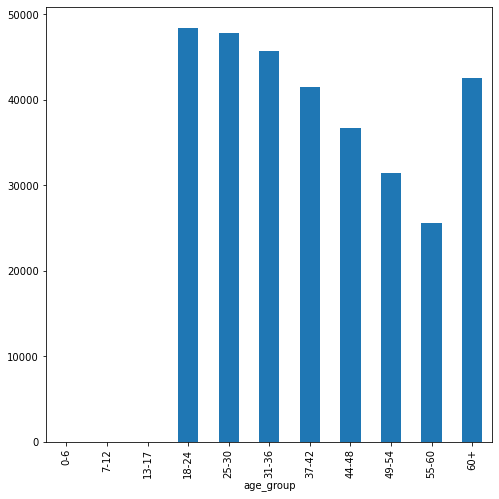

In [59]:
all_df[(all_df["voted_last_election"] == 1) & (all_df["age_yr"] >= 18)].groupby(["age_group"]).size().plot(kind="bar", figsize=(8, 8))

In [65]:
all_df['voted_last_election'].unique()

array([1, 2, 3])

In [66]:
stats.f_oneway(all_df[all_df['voted_last_election'] == 1],
               all_df[all_df['voted_last_election'] == 2])

ValueError: could not convert string to float: 'Male'

## 3. Is gender dependent to a specific reason why youths are not in school?

In [ ]:
youth_df = all_df[(all_df['age_yr'] >= 15) & (all_df['age_yr'] <= 24)]
youth_counts_df = all_df[(all_df['age_yr'] >= 15) & (all_df['age_yr'] <= 24)].groupby("sex")["ynotsch_full"].value_counts()
youth_counts_df

In [ ]:
youth_df.groupby(["ynotsch_full","sex"]).size().unstack().plot(kind="barh", figsize=(8, 8))
plt.xlabel('Disability Type')
plt.ylabel('Count')
plt.title('')

In [ ]:
#table = pd.DataFrame([youth_df["Marinduque"], youth_df["Palawan"]], index=["Marinduque", "Palawan"]).transpose()
table = pd.DataFrame([youth_counts_df["Male"], youth_counts_df["Female"]], index=["Male", "Female"]).transpose()
table

In [ ]:
chi2_contingency(table)

The $p$-value from the chi-squared test is **0.0** which means the results are highly significant that we should **reject** the **null hypothesis**, which also means that gender is dependent for the reasons why the youth are out of school.